In [24]:
%matplotlib inline
from pylab import *
import numpy as np
import math
sys.path.append('..\\')
import pyban.bandit
import pyban.adversarial
import pyban.stochastic

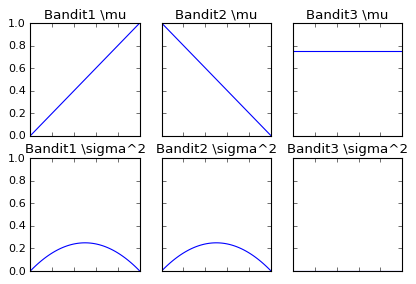

In [25]:
def mx(x):
    assert(x>=0 and x<=1)
    return [x, 1-x, 0.75]

def vx(x):
    assert(x>=0 and x<=1)
    return [x * (1-x), (1-x) * x, 0]

xs = np.linspace(0,1,100)
means = np.zeros((len(xs), 3))

means = np.array([mx(x) for x in xs])
vs = np.array([vx(x) for x in xs])
    
f, axarr = plt.subplots(2, 3, sharex=True, sharey=True)
axarr[0, 0].plot(xs, means[:, 0])
axarr[0, 0].set_title('Bandit1 \mu')
axarr[0, 1].plot(xs, means[:, 1])
axarr[0, 1].set_title('Bandit2 \mu')
axarr[0, 2].plot(xs, means[:, 2])
axarr[0, 2].set_title('Bandit3 \mu')
axarr[1, 0].plot(xs, vs[:, 0])
axarr[1, 0].set_title('Bandit1 \sigma^2')
axarr[1, 1].plot(xs, vs[:, 1])
axarr[1, 1].set_title('Bandit2 \sigma^2')
axarr[1, 2].plot(xs, vs[:, 2])
axarr[1, 2].set_title('Bandit3 \sigma^2')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 2]], visible=False)
[a.set_ylim(0,1.00) for a in axarr[0, :]]
[a.set_ylim(0,1.00) for a in axarr[1, :]]
plt.show()

In [1]:
bestBandit = [np.argmax(m) for m in means]
f, axarr = plt.subplots(2, 1)

oracle_mean = [means[i,bestBandit[i]] for i in range(len(bestBandit))]
oracle_var  = [vs[i,bestBandit[i]] for i in range(len(bestBandit))]
axarr[0].plot(xs,oracle_mean)
axarr[0].set_xlim(0,1.0)
axarr[0].set_ylim(0,1.0)
axarr[1].plot(xs,oracle_var)
axarr[1].set_xlim(0,1.0)
axarr[1].set_ylim(0,1.0)
plt.show()